# $Rb_{87}$ level diagram

In [1]:
import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
sys.path.insert(1, os.path.join(sys.path[0], '../Analysis_Python_Files/'))
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
from fitters.Gaussian import gaussian
import MarksConstants as mc

In [2]:
print(mc.Rb87_D1LineFrequency / 1e12,'THz')
print(mc.Rb87_D2LineFrequency / 1e12,'THz')
print((mc.Rb87_Ground_State_Shift(2) - mc.Rb87_Ground_State_Shift(1)) / 1e9, 'GHz')
print((mc.Rb87_D1_Excited_State_Shift(2)-mc.Rb87_D1_Excited_State_Shift(1)) / 1e6,'MHz')
print('')
print('F=2-F=3:',(mc.Rb87_D2_Excited_State_Shift(3)-mc.Rb87_D2_Excited_State_Shift(2)) / 1e6,'MHz')
print('F=1-F=2:',(mc.Rb87_D2_Excited_State_Shift(2)-mc.Rb87_D2_Excited_State_Shift(1)) / 1e6,'MHz')
print('F=0-F=1:',(mc.Rb87_D2_Excited_State_Shift(1)-mc.Rb87_D2_Excited_State_Shift(0)) / 1e6,'MHz')

377.1074635 THz
384.2304844685 THz
6.834682610904291 GHz
816.656 MHz

F=2-F=3: 266.6521 MHz
F=1-F=2: 156.9405 MHz
F=0-F=1: 72.222 MHz


DONT THINK SPACINGS HERE ARE RIGHT!

<ipython-input-79-0cbf31fa958b>:51: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(xpos-0.1, 0.75,'D1-Line:\n795 nm\n$377$ THz',fontsize=fs, multialignment='right', horizontalAlignment='right')
<ipython-input-79-0cbf31fa958b>:96: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(xpos-0.1, offs_32+0.2,'$72$ MHz',fontsize=fs, horizontalAlignment='right')
<ipython-input-79-0cbf31fa958b>:98: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(xpos-0.1, offs_32+0.7,'$157$ MHz',fontsize=fs, horizontalAlignment='right')


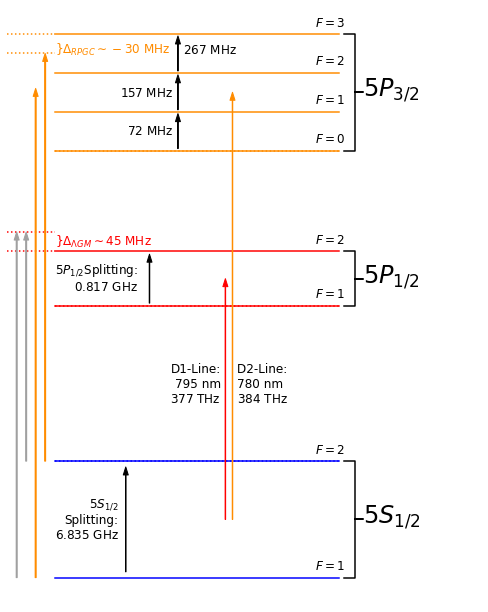

In [79]:
f, ax = plt.subplots();
fs = 12
plt.axis('Off')
f.set_size_inches(8.5,11)
#plt.subplots_adjust(left=0.1, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.xlim(-6,4)
xpts = np.linspace(-5,1 + 2* int(includeTrapShift),1000)
arrowProps = dict(linestyle='-',width=0.5, headwidth=5,headlength=8,color='k',shrink=0.05)
includeTrapShift=False
###############
# ### Ground State (5S1/2)

amp = -1*int(includeTrapShift)
plt.plot(xpts, gaussian.f(xpts,amp,0,1,0),'b')
plt.plot(xpts,np.zeros(len(xpts)),'b:')
plt.plot(xpts, gaussian.f(xpts,amp,0,1,-1.5),'b')


hfsPos = 0.5 + 2*int(includeTrapShift)
bracket(ax, hfsPos+0.6, -1.5, 1.5, 0.4)
#plt.plot([3.1,3.3,3.3,3.4,3.3,3.3,3.1], [0,0,-0.75,-0.75,-0.75,-1.5,-1.5],color='k')
plt.text(hfsPos+1,-0.8,'$5S_{1/2}$',fontsize=24);
plt.text(hfsPos,0.1,'$F=2$',fontsize=fs);
plt.text(hfsPos,-1.4,'$F=1$',fontsize=fs);


if includeTrapShift:
    t=plt.text(0.1, -0.75,'Trap Depth:\n1 mK\n-20.8 MHz',fontsize=fs)
    t.set_bbox(dict(facecolor='w', alpha=0.7, edgecolor='w'))
    ax.annotate("", xy=(0, -1), xytext=(0, 0), arrowprops=arrowProps)

plt.text(-5, -1, '$5S_{1/2}$\nSplitting:\n$6.835$ GHz',fontsize=fs, multialignment='right')
ax.annotate("", xy=(-3.5, 0), xytext=(-3.5, -1.5), arrowprops=arrowProps);

###############
# ### 5P1/2
offs_12 = 2
c_12 = 'red'
amp = 0.577*int(includeTrapShift)
plt.plot(xpts, gaussian.f(xpts,amp,0,1,offs_12),color=c_12)
plt.plot(xpts, np.zeros(len(xpts))+offs_12,':',color=c_12)
plt.plot(xpts, gaussian.f(xpts,amp,0,1,offs_12+0.7),color=c_12)

#plt.plot([3.1,3.3,3.3,3.4,3.3,3.3,3.1], [2,2,2.35,2.35,2.35,2.7,2.7],color='k')
bracket(ax, hfsPos+0.6, 2, 0.7, 0.4)
plt.text(hfsPos,2.1,'$F=1$',fontsize=fs);
plt.text(hfsPos,2.8,'$F=2$',fontsize=fs);
plt.text(hfsPos+1,2.3,'$5P_{1/2}$',fontsize=24)

xpos = -2.4 + int(not includeTrapShift)
plt.text(xpos-0.1, 0.75,'D1-Line:\n795 nm\n$377$ THz',fontsize=fs, multialignment='right', horizontalAlignment='right')
ax.annotate("", xy=(xpos, 2.35), xytext=(xpos, -0.75), 
            arrowprops=dict(linestyle='-',width=0.5, headwidth=5,headlength=8,color=c_12));

plt.text(-5, 2.2, '$5P_{1/2}$Splitting:\n$0.817$ GHz',fontsize=fs, multialignment='right')
xpos = -3
ax.annotate("", xy=(xpos, 2.7), xytext=(xpos, 2), arrowprops=arrowProps);

if includeTrapShift:
    t = plt.text(0.1, 2.05, 'Antitrapping:\n$-0.574$ mK\n$12.0$ MHz',fontsize=fs)
    t.set_bbox(dict(facecolor='w', alpha=0.7, edgecolor='w'))
    ax.annotate("", xy=(0, 2.574), xytext=(0, 2), arrowprops=arrowProps);

###############
# ### 5P3/2
c = 'darkorange'
offs_32 = 4
amp = 0.470 * int(includeTrapShift)
plt.plot(xpts, gaussian.f(xpts,amp,0,1,offs_32),color=c)
plt.plot(xpts, np.zeros(len(xpts))+offs_32,':',color=c)
plt.plot(xpts, gaussian.f(xpts,amp,0,1,offs_32+0.5),color=c)
plt.plot(xpts, gaussian.f(xpts,amp,0,1,offs_32+1),color=c)
plt.plot(xpts, gaussian.f(xpts,amp,0,1,offs_32+1.5),color=c)

# States
manMax = offs_32+1.5
mid = (manMax+offs_32) / 2
#plt.plot([3.1,3.3,3.3,3.4,3.3,3.3,3.1], [offs_32,offs_32,mid,mid,mid,manMax,manMax],color='k')
bracket(ax, hfsPos+0.6, offs_32, 1.5, 0.4)
plt.text(hfsPos, offs_32+0.1, '$F=0$',fontsize=fs)
plt.text(hfsPos, offs_32+0.6, '$F=1$',fontsize=fs)
plt.text(hfsPos, offs_32+1.1, '$F=2$',fontsize=fs)
plt.text(hfsPos, offs_32+1.6, '$F=3$',fontsize=fs)
plt.text(hfsPos+1, offs_32+0.7,'$5P_{3/2}$',fontsize=24)

xpos = -2.25 + int(not includeTrapShift)
plt.text(xpos+0.1, 0.75,'D2-Line: \n780 nm\n$384$ THz',fontsize=fs, multialignment='left')
ax.annotate("", xy=(xpos, offs_32+0.75), xytext=(xpos, -0.75), 
            arrowprops=dict(linestyle='-',width=0.5, headwidth=5,headlength=8,color=c));

if includeTrapShift:
    t = plt.text(0.1, offs_32-0.1, 'Antitrapping:\n$-0.470$ mK\n$9.9$ MHz',fontsize=fs)
    t.set_bbox(dict(facecolor='w', alpha=0.7, edgecolor='w'))
    ax.annotate("", xy=(0, offs_32+0.47), xytext=(0, offs_32), arrowprops=arrowProps);
xpos = -2.4
plt.text(xpos-0.1, offs_32+0.2,'$72$ MHz',fontsize=fs, horizontalAlignment='right')
ax.annotate("", xy=(xpos, offs_32+0.5), xytext=(xpos, offs_32 ), arrowprops=arrowProps);
plt.text(xpos-0.1, offs_32+0.7,'$157$ MHz',fontsize=fs, horizontalAlignment='right')
ax.annotate("", xy=(xpos, offs_32+1), xytext=(xpos, offs_32+0.5), arrowprops=arrowProps);
plt.text(xpos+0.1, offs_32+1.25,'$267$ MHz',fontsize=fs)
ax.annotate("", xy=(xpos, offs_32+1.5), xytext=(xpos, offs_32+1), arrowprops=arrowProps);

# Lasers
#plt.text(-5, offs_32+1.2,'$72$ MHz',fontsize=fs)
# red lasers
ax.annotate("", xy=(-5.2, offs_32+1.25), xytext=(-5.2, 0), 
            arrowprops=dict(linestyle='-',width=1, headwidth=5,headlength=8,color=c,shrink=0));
ax.annotate("", xy=(-5.4, offs_32+0.8), xytext=(-5.4, -1.5), 
            arrowprops=dict(linestyle='-',width=1, headwidth=5,headlength=8,color=c,shrink=0));
plt.plot([-6,-5],[offs_32+1.25,offs_32+1.25],':',color=c)
plt.plot([-6,-5],[offs_32+1.5,offs_32+1.5],':',color=c)
plt.text(-5, offs_32+1.25, '}$\Delta_{RPGC}\sim-30$ MHz', fontsize=fs, color=c);

# grey lasers
ax.annotate( "", xy=(-5.6, offs_12+0.95), xytext=(-5.6, 0), 
             arrowprops=dict(linestyle='-',width=1, headwidth=5,headlength=8,color='#a0a0a0',shrink=0) );
ax.annotate( "", xy=(-5.8, offs_12+0.95), xytext=(-5.8, -1.5), 
             arrowprops=dict(linestyle='-',width=1, headwidth=5,headlength=8,color='#a0a0a0',shrink=0) );
plt.plot([-6,-5],[offs_12+0.95,offs_12+0.95],':',color=c_12)
plt.plot([-6,-5],[offs_12+0.70,offs_12+0.7],':',color=c_12)
plt.text(-5, offs_12+0.775,'}$\Delta_{\Lambda GM}\sim$45 MHz',fontsize=fs,color=c_12);
#plt.savefig('RB87_D1_D2_Lines.png', dpi=200,transparent=True, bbox_inches='tight', pad_inches=0)

In [57]:
def bracket(a, x, y, h, w, c='k'):
    x2 = x+0.6*w
    x3 = x+w
    y2 = y+h/2
    y3 = y+h
    a.plot( [x,x2,x2, x3, x2, x2, x], [y,y,y2,y2,y2,y3,y3], color=c )

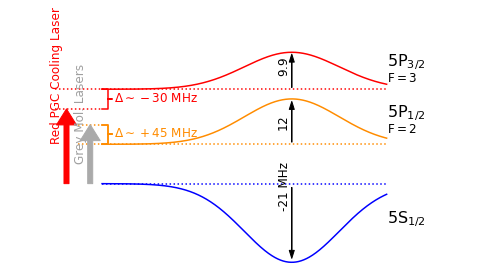

In [5]:
f = plt.figure();
plt.axis('Off')
f.set_size_inches(8.5,4.25)
plt.xlim(-6,4)
xpts = np.linspace(-4,2,1000)
arrowProps = dict(linestyle='-',width=0.5, headwidth=5,headlength=8,color='k',shrink=0.05)
###############
# ### Ground State (5S1/2)

plt.plot(xpts, gaussian.f(xpts,-1,0,1,0),'b')
plt.plot(xpts,np.zeros(len(xpts)),'b:')

plt.text(2,-0.5,'5S$_{1/2}$',fontsize=16);

ax = plt.gca()
# 1mk
t=plt.text(-0.3, -0.3, '-21 MHz',fontsize=12,rotation=90)
#t.set_bbox(dict(facecolor='w', alpha=0.7, edgecolor='w'))
ax.annotate("", xy=(0, -1), xytext=(0, 0), arrowprops=arrowProps)

###############
# ### 5P1/2
offs_12 = 0.5
c_12 = 'darkorange'
plt.plot(xpts, gaussian.f(xpts,0.577,0,1,offs_12),color=c_12)
plt.plot(xpts, np.zeros(len(xpts))+offs_12,':',color=c_12)

plt.text( 2, offs_12+0.35, '5P$_{1/2}$',fontsize=16)
plt.text( 2, offs_12+0.15, 'F$=2$',fontsize=12)
#plt.text(-4, 0.75, 'D1-Line: \n795 nm',fontsize=12)

xpos = -2.75
#ax.annotate("", xy=(xpos, offs_12), xytext=(xpos, 0), 
#            arrowprops=dict(linestyle='-',width=0.5, headwidth=5,headlength=8,color=c_12));

xpos = -3
# -0.574mK
t = plt.text(-0.3, offs_12+0.2, '$12$',fontsize=12,rotation=90)
t.set_bbox(dict(facecolor='w', alpha=0.7, edgecolor='w'))
ax.annotate("", xy=(0, offs_12 + 0.574), xytext=(0, offs_12), arrowprops=arrowProps);

###############
# ### 5P3/2
c = 'red'
offs_32 = 1.2
plt.plot(xpts, gaussian.f(xpts,0.470,0,1,offs_32),color=c)
plt.plot(xpts, np.zeros(len(xpts))+offs_32,':',color=c)

# States
manMax = offs_32+1.5
mid = (manMax+offs_32) / 2
plt.text(2, offs_32+0.3,'5P$_{3/2}$',fontsize=16)
plt.text(2, offs_32+0.1,'F$=3$',fontsize=12)

xpos = -2.5
#plt.text(-2.4, 0.75,'D2-Line: \n780 nm',fontsize=12)
#ax.annotate("", xy=(xpos, offs_32), xytext=(xpos, 0), 
#            arrowprops=dict(linestyle='-',width=0.5, headwidth=5,headlength=8,color=c));
# -0.470mK
t = plt.text(-0.3, offs_32+0.2, '$9.9$',fontsize=12,rotation=90)
#t.set_bbox(dict(facecolor='w', alpha=0.7, edgecolor='w'))
ax.annotate("", xy=(0, offs_32+0.47), xytext=(0, offs_32), arrowprops=arrowProps);
xpos = -2.9

###### Lasers
# Red 
plt.plot([-5,-4],[offs_32,offs_32],':', color=c )
plt.plot([-5,-4],[offs_32-0.25,offs_32-0.25],':', color=c )
plt.text(-3.75, offs_32-0.15,  '$\Delta\sim-30$ MHz', fontsize=12, color=c)
plt.text(-5.1, 0.55,  'Red PGC Cooling Laser', fontsize=12, color=c, rotation=90)
xpos = -4.75
ax.annotate("", xy=(xpos, offs_32-0.25), xytext=(xpos, 0), 
            arrowprops=dict(linestyle='-',width=5, headwidth=20,headlength=16,color='r'))

bracket ( ax, -4,  offs_12, 0.25, 0.2, c=c_12 )
bracket(ax, -4, offs_32-0.25, 0.25, 0.2, c=c)
# grey lasers
plt.plot([-4.5,-4], [offs_12+0.25,offs_12+0.25],':',color=c_12)
plt.plot([-4.5,-4], [offs_12,offs_12],':',color=c_12)
plt.text( -3.75, offs_12 + 0.1, '$\Delta\sim+45$ MHz', fontsize=12, color=c_12 );
plt.text(-4.6, 0.3,  'Grey Mol. Lasers', fontsize=12, color="#A0A0A0", rotation=90);
xpos = -4.25
ax.annotate( "", xy=(xpos, offs_12+0.25), xytext=(xpos, 0), 
             arrowprops=dict(linestyle='-',width=5, headwidth=20,headlength=16,color='#AAAAAA') );
bracket ( ax, -4,  offs_12, 0.25, 0.2, c=c_12 )
plt.savefig( 'RB87_Level_Diagram_Grey_Paper.png', dpi=400, transparent=True, bbox_inches='tight', pad_inches=0 )